# import lib

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# load dataset

In [2]:
st_data= pd.read_excel('input/data.xlsx')

In [3]:
st_data.head()

,Subject1,Subject2,Subject3,Subject4,Subject5,Subject6,Subject7,Subject8,Subject9,Aptitute Test,Technical Skills,English Skills,olympiads,reading and writing skills,memory capability score,Suggested Job Role,Placed College / Degree
0,69,63,78,87,94,94,87,84,61,4,4,8,yes,excellent,excellent,Database Developer,IIT Chennai Automobile
1,78,62,73,60,71,70,73,84,91,7,2,3,no,poor,medium,Portal Administrator,IIT Kharagpur EEE
2,71,86,91,87,61,81,72,72,94,1,1,3,yes,poor,excellent,Portal Administrator,IIT Kharagpur EEE
3,76,87,60,84,89,73,62,88,69,1,2,5,no,medium,excellent,Systems Security Administrator,IIT Delhi Civil
4,92,62,90,67,71,89,73,71,73,5,6,3,no,poor,excellent,Business Systems Analyst,IIT Chennai EEE


In [4]:
st_data.shape

(20000, 17)

In [5]:
st_data.columns

Index(['Subject1', 'Subject2', 'Subject3', 'Subject4', 'Subject5', 'Subject6',
       'Subject7', 'Subject8', 'Subject9', 'Aptitute Test', 'Technical Skills',
       'English Skills', 'olympiads', 'reading and writing skills',
       'memory capability score', 'Suggested Job Role',
       'Placed College / Degree'],
      dtype='object')

# data preprocessing

In [6]:
st_data['olympiads'].unique()

array(['yes', 'no'], dtype=object)

In [7]:
st_data['olympiads'].replace('no',0,inplace=True)
st_data['olympiads'].replace('yes',1,inplace=True)

In [8]:
st_data['reading and writing skills'].unique()

array(['excellent', 'poor', 'medium'], dtype=object)

In [9]:
st_data['reading and writing skills'].replace('poor',0,inplace=True)
st_data['reading and writing skills'].replace('medium',1,inplace=True)
st_data['reading and writing skills'].replace('excellent',2,inplace=True)

In [10]:
st_data['memory capability score'].unique()

array(['excellent', 'medium', 'poor'], dtype=object)

In [11]:
st_data['memory capability score'].replace('poor',0,inplace=True)
st_data['memory capability score'].replace('medium',1,inplace=True)
st_data['memory capability score'].replace('excellent',2,inplace=True)

In [ ]:
st_data['Suggested Job Role'].unique()

In [12]:
n = st_data['Suggested Job Role'].unique()

In [13]:
j = 0
for i in n:
    st_data['Suggested Job Role'].replace(i,j,inplace=True)
    j += 1

In [14]:
n = st_data['Placed College / Degree'].unique()

In [15]:
j = 0
for i in n:
    st_data['Placed College / Degree'].replace(i,j,inplace=True)
    j += 1

In [16]:
st_data.head()

,Subject1,Subject2,Subject3,Subject4,Subject5,Subject6,Subject7,Subject8,Subject9,Aptitute Test,Technical Skills,English Skills,olympiads,reading and writing skills,memory capability score,Suggested Job Role,Placed College / Degree
0,69,63,78,87,94,94,87,84,61,4,4,8,1,2,2,0,0
1,78,62,73,60,71,70,73,84,91,7,2,3,0,0,1,1,1
2,71,86,91,87,61,81,72,72,94,1,1,3,1,0,2,1,1
3,76,87,60,84,89,73,62,88,69,1,2,5,0,1,2,2,2
4,92,62,90,67,71,89,73,71,73,5,6,3,0,0,2,3,3


# data analysis

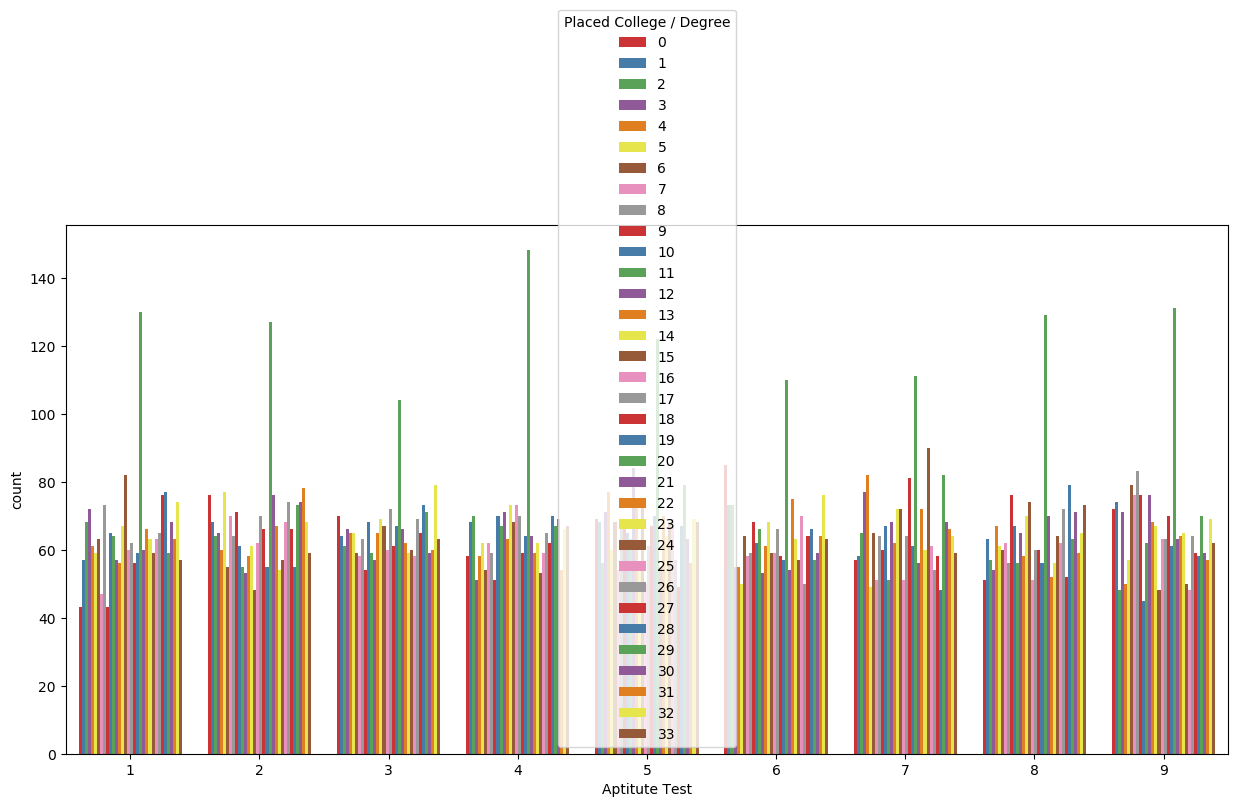

In [17]:
plt.figure(figsize=(15,7), dpi=100)
sns.countplot(x='Aptitute Test',hue='Placed College / Degree',data=st_data, palette='Set1')

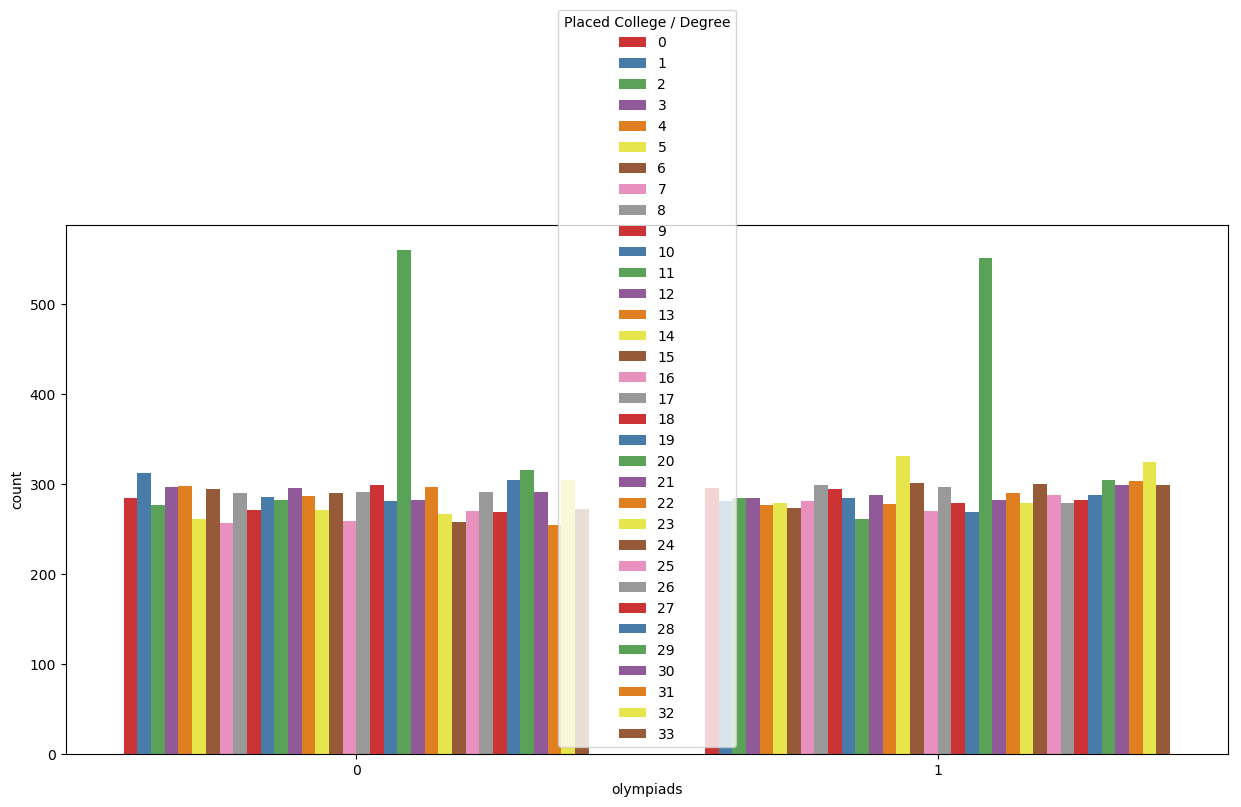

In [18]:
plt.figure(figsize=(15,7), dpi=100)
sns.countplot(x='olympiads',hue='Placed College / Degree',data=st_data, palette='Set1')

# split the data into train and test

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
X = st_data.drop('Placed College / Degree', axis=1)
y = st_data['Placed College / Degree']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=101)
X_train.head(10)

,Subject1,Subject2,Subject3,Subject4,Subject5,Subject6,Subject7,Subject8,Subject9,Aptitute Test,Technical Skills,English Skills,olympiads,reading and writing skills,memory capability score,Suggested Job Role
443,71,79,69,89,62,92,62,89,79,3,6,3,1,0,0,5
10301,63,86,66,69,86,91,71,69,76,3,8,9,1,1,1,23
10094,86,90,72,73,91,60,90,82,64,9,8,7,1,2,0,24
10849,86,77,90,88,69,90,83,92,80,9,6,3,1,0,2,24
2279,93,81,72,84,90,93,73,85,72,7,8,8,1,2,0,11
2359,72,83,70,69,61,83,73,83,91,2,7,5,0,0,2,20
19753,70,91,63,82,71,68,73,63,60,2,5,8,0,2,2,3
13394,79,60,79,73,78,87,90,89,87,3,4,7,0,0,0,8
11111,76,63,90,66,67,75,87,66,88,4,9,6,1,0,2,19
3760,63,85,63,63,61,67,86,73,63,9,9,8,1,0,2,8


In [21]:
X_train.to_excel('Traning_Testing/X_train.xlsx', index=False)
X_test.to_excel('Traning_Testing/X_test.xlsx', index=False)
y_train.to_excel('Traning_Testing/y_train.xlsx', index=False)
y_test.to_excel('Traning_Testing/y_test.xlsx', index=False)

# Train the RF model

In [22]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [23]:
rfc = RandomForestClassifier(n_estimators=600)

In [24]:
rfc = rfc.fit(X_train,y_train)

# Predictions and Evaluation

In [25]:
predictions_rf = rfc.predict(X_test)

In [26]:
acc_rf = accuracy_score(y_true=y_test, y_pred= predictions_rf)
print("Overall accuracy of RF model using test-set is : %f" %(acc_rf*100))

Overall accuracy of RF model using test-set is : 99.600000


In [27]:
print(classification_report(y_test,predictions_rf))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       126
           1       1.00      1.00      1.00       127
           2       1.00      1.00      1.00       119
           3       1.00      1.00      1.00        98
           4       1.00      1.00      1.00       116
           5       1.00      0.97      0.99       110
           6       0.96      1.00      0.98       114
           7       1.00      0.98      0.99       122
           8       0.99      1.00      1.00       112
           9       0.97      1.00      0.98       111
          10       1.00      0.96      0.98       113
          11       1.00      1.00      1.00       105
          12       1.00      1.00      1.00       107
          13       1.00      0.99      1.00       104
          14       0.99      1.00      1.00       122
          15       1.00      1.00      1.00       130
          16       1.00      1.00      1.00        93
          17       1.00    

In [28]:
print(confusion_matrix(y_test,predictions_rf))

[[126   0   0 ...   0   0   0]
 [  0 127   0 ...   0   0   0]
 [  0   0 119 ...   0   0   0]
 ...
 [  0   0   0 ... 103   0   0]
 [  0   0   0 ...   0 142   0]
 [  0   0   0 ...   0   0 101]]


# Train DT model

In [32]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [33]:
dt = DecisionTreeClassifier()

In [34]:
dt = dt.fit(X_train,y_train)

# Predictions and Evaluation

In [35]:
predictions_dt = dt.predict(X_test)

In [36]:
acc_dt = accuracy_score(y_true=y_test, y_pred= predictions_dt)
print("Overall accuracy of DT model using test-set is : %f" %(acc_dt*100))

Overall accuracy of DT model using test-set is : 100.000000


In [37]:
print(classification_report(y_test,predictions_dt))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       126
           1       1.00      1.00      1.00       127
           2       1.00      1.00      1.00       119
           3       1.00      1.00      1.00        98
           4       1.00      1.00      1.00       116
           5       1.00      1.00      1.00       110
           6       1.00      1.00      1.00       114
           7       1.00      1.00      1.00       122
           8       1.00      1.00      1.00       112
           9       1.00      1.00      1.00       111
          10       1.00      1.00      1.00       113
          11       1.00      1.00      1.00       105
          12       1.00      1.00      1.00       107
          13       1.00      1.00      1.00       104
          14       1.00      1.00      1.00       122
          15       1.00      1.00      1.00       130
          16       1.00      1.00      1.00        93
          17       1.00    

In [38]:
print(confusion_matrix(y_test,predictions_dt))

[[126   0   0 ...   0   0   0]
 [  0 127   0 ...   0   0   0]
 [  0   0 119 ...   0   0   0]
 ...
 [  0   0   0 ... 103   0   0]
 [  0   0   0 ...   0 142   0]
 [  0   0   0 ...   0   0 101]]


# Thank You..